<h2> Signálový procesing a procesory <small> (2313005) </small></h2>

<h2>Notes 2</h2> 
<br>
<div style="width:100%;height:5px;background-color:green;"></div>

<small>doc. Ing.</small> Ivo Bukovský, <small>Ph.D.</small>  <br>
<small>Ústav mechaniky, biomechaniky a mechatroniky (12105)</small>

<div style="width:100%;height:10px;background-color:green;">

<h3>Filtry</h3>
<ul>
<li> analogové vs. digitální<ul>
<li> charakteristiky: impulsní, přechodová, frekvenční</li>
<li> filtrování frekvencí, pásmové filtry, propusti, zdrže, cut-off frekvence, Chebyschew, Butterworth</li></ul>
<li>filtr v plovoucím okně (jednoduché potlačení šumu, coarse-graining, kernely)</li>
<li> FIR - filtry s konečnou (im)pulsní odezvou</li>
<li> IIR - filtry s nekonečnou (im)pulsní odezvou</li>
<li> adaptivní filtry (filtrace jednoho signálu, "tracking", kauzální filtr)<ul><li>
 krokové (inkrementální, step-by-step</li><li>
 dávkové (batch,"oknové") </li></ul>
<li> navrhování digitálních filtrů () <ul><li>
návrh adaptivního filtru s konečnou pulsní odezvou </li>
<li> návrh adaptivního filtru s nekonečnou pulsní odezvou (rekurzivní filtr)</li></ul>
</li>
<li> Filtrace Fourierovou Transformací </li>
<li> Kauzální Filtrace pomocí PCA (Principal Component Analysis)</li> 
</ul>

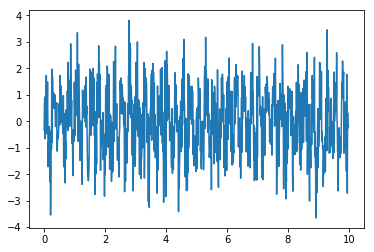

In [1]:
%matplotlib inline  
from numpy import *
from matplotlib.pyplot import *
dt=.01
t=arange(0,10,dt)
N=len(t)
f=4 #[Hz]
y=sin(2*pi*f*t)+random.randn(N)

plot(t,y)
show()

<div style="width:100%;height:5px;background-color:green;"></div>

## Filtrace Fourierovou Transformací

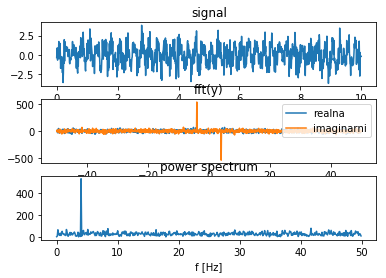

In [2]:
from numpy.fft import fft, fftfreq, ifft

ffty=fft(y)

real_ffty=ffty.real
imag_ffty=ffty.imag

freqs=fftfreq(N,dt)

#%matplotlib  # vykresli samostatny (interaktivni) graf
figure()
subplot(311)
plot(t,y);title("signal");xlabel('t [sec]')
subplot(312)
plot(freqs,real_ffty,label="realna");title('fft(y)')
plot(freqs,imag_ffty,label="imaginarni");xlabel('f [Hz]')
legend()
subplot(313)
plot(freqs[:N/2],abs(ffty)[:N/2]);title('power spectrum');xlabel('f [Hz]')
show()

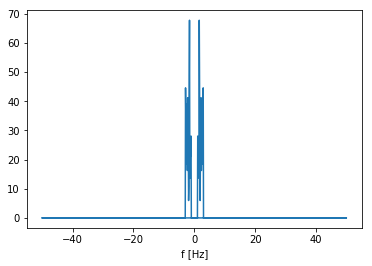

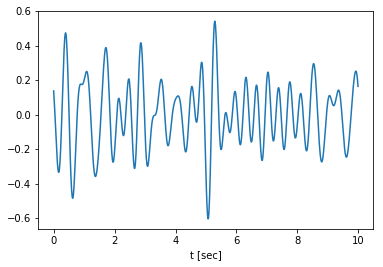

In [4]:
# Odfiltrovani pasma frekvenci (band)
# tj. chceme zachovat frekvence <f-band,f+band>
band=1 # [Hz]
# fft je symetricka ,tj. od -fmax Hz...+fmax Hz, takze filtrujeme i zaporne ve Frekvencni oblasti
ffty_filtr=ffty.copy()  # 
F=2  #[Hz]

for k in range(N):
    if freqs[k]>(-F-band) and freqs[k]<(-F+band):
        ffty_filtr[k]=ffty[k]
    elif freqs[k]>(F-band) and freqs[k]<(F+band):
        ffty_filtr[k]=ffty[k]
    else:
        ffty_filtr[k]=0

#print ffty_filtr
#%matplotlib  # vykresli samostatny (interaktivni) graf

plot(freqs,abs(ffty_filtr));xlabel('f [Hz]');show()

y_filtrovany=ifft(ffty_filtr)

plot(t,y_filtrovany);xlabel('t [sec]');show()


<div style="width:100%;height:10px;background-color:green;"></div>
<h3> Odkazy </h3>
<div style=width:5%px;float:left;>[1]</div>
<div style=width:90%px;float:left;>
"..."
</div>
</div>

<hr>